# Assessing the compared speed between man and women

The null hypothesis would be: Women's average speed is the same or lower than men
The alternative hypothesis: Men bike faster than women do.
With an alpha of 0.05

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
%pylab inline
import os
import json
import geopy
from geopy.distance import vincenty

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls /gws/open/Student/citibike;

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [3]:
#extracting the file from the data folder for june 2017
rawdf =pd.read_csv('/gws/open/Student/citibike/201706-citibike-tripdata.csv.zip', compression='zip',index_col=None)

In [5]:
rawdf

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1397,2017-06-01 00:00:02,2017-06-01 00:23:19,515,W 43 St & 10 Ave,40.760094,-73.994618,3285,W 87 St & Amsterdam Ave,40.788390,-73.974700,26642,Subscriber,1967.0,1
1,1103,2017-06-01 00:00:13,2017-06-01 00:18:37,488,W 39 St & 9 Ave,40.756458,-73.993722,297,E 15 St & 3 Ave,40.734232,-73.986923,25656,Subscriber,1981.0,1
2,1810,2017-06-01 00:00:20,2017-06-01 00:30:31,461,E 20 St & 2 Ave,40.735877,-73.982050,465,Broadway & W 41 St,40.755136,-73.986580,21023,Subscriber,1982.0,1
3,1760,2017-06-01 00:00:24,2017-06-01 00:29:45,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,25718,Subscriber,1973.0,2
4,2165,2017-06-01 00:00:33,2017-06-01 00:36:38,360,William St & Pine St,40.707179,-74.008873,474,5 Ave & E 29 St,40.745168,-73.986831,18691,Subscriber,1985.0,1
5,608,2017-06-01 00:00:37,2017-06-01 00:10:45,310,State St & Smith St,40.689269,-73.989129,3386,1 Pl & Clinton St,40.680959,-73.999057,20729,Subscriber,1976.0,1
6,416,2017-06-01 00:00:40,2017-06-01 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,3255,8 Ave & W 31 St,40.750585,-73.994685,27900,Subscriber,1987.0,1
7,414,2017-06-01 00:01:08,2017-06-01 00:08:02,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,20813,Subscriber,1985.0,1
8,408,2017-06-01 00:01:11,2017-06-01 00:08:00,433,E 13 St & Avenue A,40.729554,-73.980572,473,Rivington St & Chrystie St,40.721101,-73.991925,16478,Subscriber,1988.0,1
9,1386,2017-06-01 00:01:14,2017-06-01 00:24:20,309,Murray St & West St,40.714979,-74.013012,476,E 31 St & 3 Ave,40.743943,-73.979661,26763,Subscriber,1993.0,1


In [6]:
df=rawdf[rawdf.gender!=0]
df=df.reset_index()

In [7]:
df=df.drop(['index','start station id','end station id','start station name','end station name'
         ,'bikeid','usertype','birth year','starttime','stoptime'],axis=1)

# Dropping the columns

In [8]:
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,gender
0,1397,40.760094,-73.994618,40.788390,-73.974700,1
1,1103,40.756458,-73.993722,40.734232,-73.986923,1
2,1810,40.735877,-73.982050,40.755136,-73.986580,1
3,1760,40.711174,-73.996826,40.744023,-73.976056,2
4,2165,40.707179,-74.008873,40.745168,-73.986831,1


 # Calculating the speed and anexing it to the dataframe

In [9]:
speed=[]
for n in range(0,len(df)):
    startpointlat=df['start station latitude'][n]
    startointlong=df['start station longitude'][n]
    endpointlat=df['end station latitude'][n]
    endpointlong=df['end station longitude'][n]
    tripduration=df['tripduration'][n]
    point=(startpointlat,startointlong)
    endpoint=(endpointlat,endpointlong)
    distance=vincenty(point, endpoint).meters
    vel=distance/tripduration
    speed.append(vel)
    #if n%100000 == 0:
      #  print(n)

In [43]:
df['speed'] = pd.Series(speed, index=df.index)

In [44]:
df

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,gender,speed
0,1397,40.760094,-73.994618,40.788390,-73.974700,1,2.551083
1,1103,40.756458,-73.993722,40.734232,-73.986923,1,2.297483
2,1810,40.735877,-73.982050,40.755136,-73.986580,1,1.200344
3,1760,40.711174,-73.996826,40.744023,-73.976056,2,2.299926
4,2165,40.707179,-74.008873,40.745168,-73.986831,1,2.129923
5,608,40.689269,-73.989129,40.680959,-73.999057,1,2.051674
6,416,40.739017,-74.002638,40.750585,-73.994685,1,3.484763
7,414,40.689407,-73.968855,40.693261,-73.968896,1,1.033674
8,408,40.729554,-73.980572,40.721101,-73.991925,1,3.289321
9,1386,40.714979,-74.013012,40.743943,-73.979661,1,3.085098


In [45]:
dfwomen=df[df.gender==2]
dfwomen=dfwomen.reset_index()

In [46]:
dfmen=df[df.gender==1]
dfmen=dfmen.reset_index()

In [47]:
mu=dfwomen['speed'].mean()
mean=df['speed'].mean()
sigma=np.std(df['speed'])
N=len(dfwomen)
Z=np.sqrt(N)*(mean-mu)/sigma
print 'Sample mean: {}, Pop mean: {}, Population sigma:{}, Sample size: {}, Z score: {}'.format(mu,mean,sigma,N,Z)

Sample mean: 2.35274290995, Pop mean: 2.60537506168, Population sigma:41.1506665275, Sample size: 401253, Z score: 3.88884732611


The Z score being higher than 2.5 (whose probaility is 0.0062 according to table 1 of the Standard Normal Distribution Chapter of Statistics in a Nutshell by David M. Lane) means the null hypthesis can be rejected. Therefore the alternative hypthesis holds true: Men bike faster than women do!

In [48]:
dfmen=dfmen[dfmen.speed!=0]
dfmen=dfmen.reset_index()
dfwomen=dfwomen[dfwomen.speed!=0]
dfwomen=dfwomen.reset_index()

In [62]:
menspeed=dfmen.groupby(['speed']).size()
womenspeed=dfwomen.groupby(['speed']).size()

# Plotting the histogram of speed vs frequency

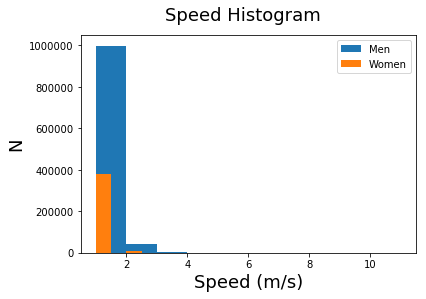

In [68]:
pl.hist(menspeed)
pl.hist(womenspeed)
pl.xlabel('Speed (m/s)', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.suptitle('Speed Histogram', fontsize = 18)
pl.legend(['Men','Women'])
pl.show()